# Limpeza e Tratamento de dados

In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
#import de dados
dataset = pd.read_csv('../data/Churn.csv', sep=';')
#visualize
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
#tamanho
dataset.shape

(999, 12)

In [4]:
#primeiro resolver o problema relacionado aos nomes das colunas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [5]:
#Visualize
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#Explorar dados categoricos
#estado
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

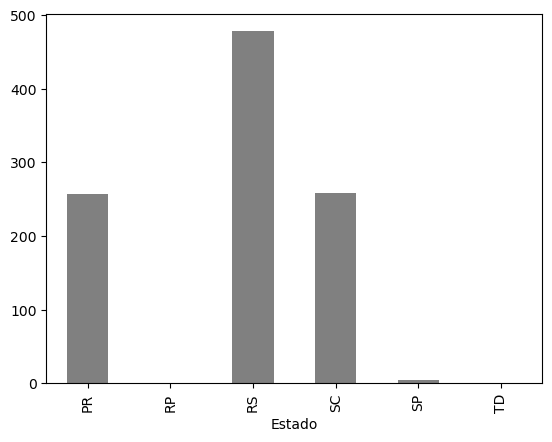

In [7]:
agrupado.plot.bar(color="gray")

In [8]:
#genero
agrupado = dataset.groupby("Genero").size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

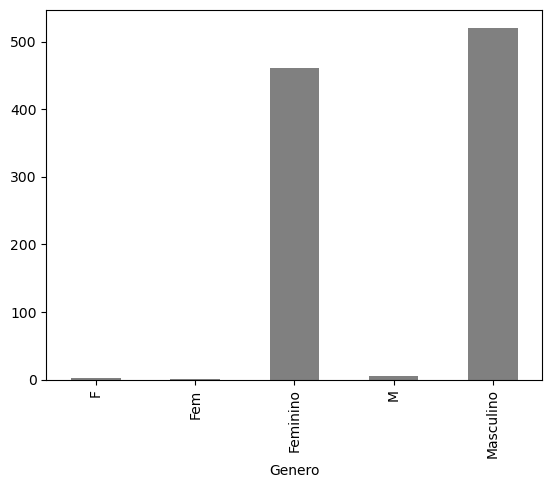

In [9]:
agrupado.plot.bar(color="gray")

In [10]:
#Explorar colunas numericas
#Score
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

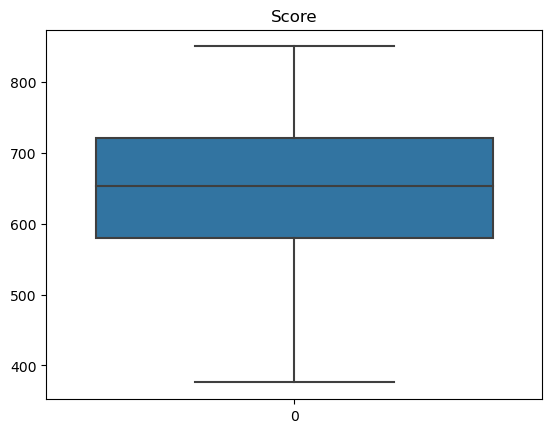

In [11]:
sns.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

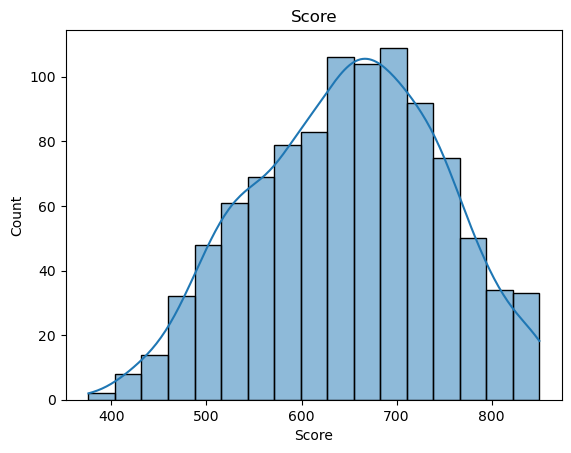

In [12]:
sns.histplot(dataset["Score"], kde=True).set_title("Score")

In [13]:
#idade
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

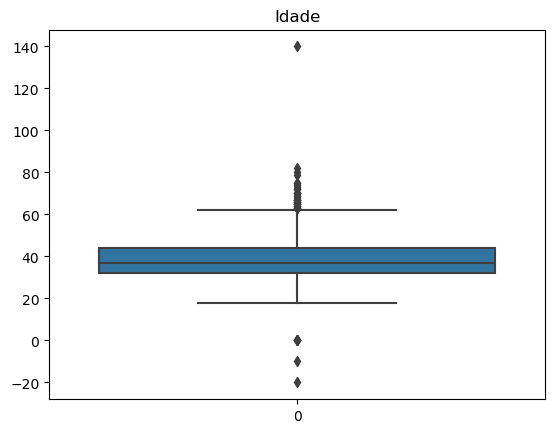

In [14]:
sns.boxplot(dataset["Idade"]).set_title('Idade')

Text(0.5, 1.0, 'Idade')

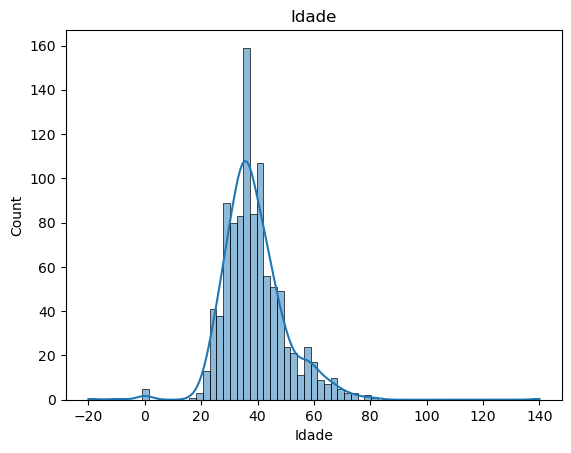

In [15]:
sns.histplot(dataset["Idade"], kde=True).set_title("Idade")

In [16]:
#saldo
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

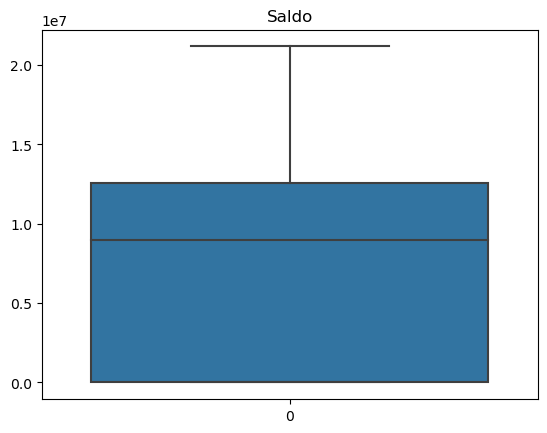

In [17]:
sns.boxplot(dataset["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

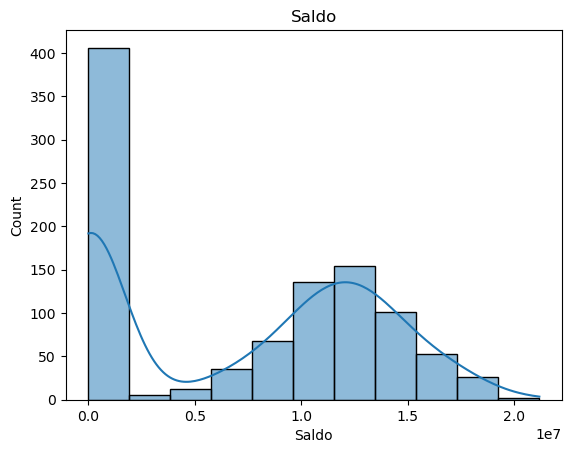

In [18]:
sns.histplot(dataset["Saldo"], kde=True).set_title("Saldo")

In [19]:
#Salario
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

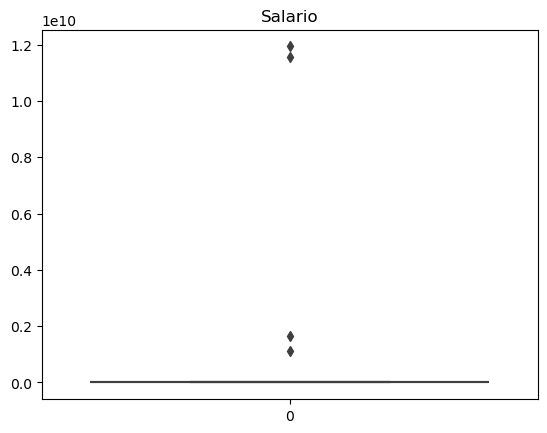

In [20]:
sns.boxplot(dataset['Salario']).set_title("Salario")

Text(0.5, 1.0, 'Salario')

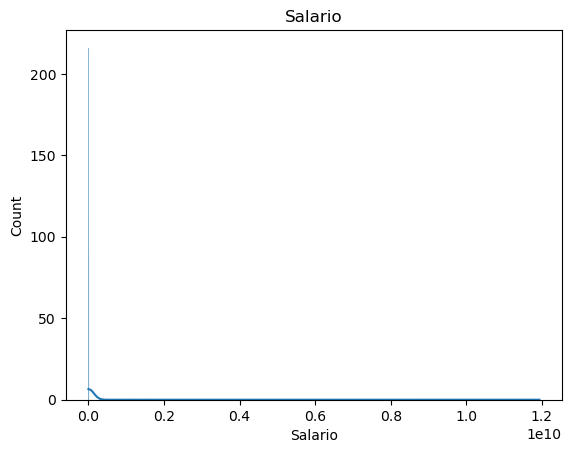

In [21]:
sns.histplot(dataset["Salario"], kde=True).set_title("Salario")

In [22]:
#contar valores nan e null
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [24]:
#substituir nas pela mediana em salarios
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [25]:
median = sts.median(dataset["Salario"])
median

70518.0

In [26]:
#substituir NAN por mediana
dataset["Salario"].fillna(median, inplace=True)

In [27]:
#verificar NAN em salario
dataset["Salario"].isnull().sum()

0

In [28]:
#Genero, falta padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [29]:
#Preencher os NAN com a moda (masculino)
dataset['Genero'].fillna('Masculino', inplace=True)

In [30]:
#verificar nulls
dataset["Genero"].isnull().sum()

0

In [31]:
#padronizar:
dataset.loc[dataset["Genero"] == "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin(['F','Fem']), "Genero" ] = "Feminino"
#visualizar
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [32]:
#Idades fora do dominio
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [34]:
#visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [35]:
#calcular mediana
median = sts.median(dataset["Idade"])
median

37

In [36]:
#substituir
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)] = median

In [37]:
#verificar se ainda existe idade fora do padrão
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [38]:
#verificar duplicadas, buscando pelo id

dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [39]:
#excluindo duplicadas pelo ID
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
#verificando duplicadas
dataset[dataset.duplicated(['Id'], keep='first')]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [40]:
#estados fora do dominio
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [41]:
#atribuido a moda (RS pois é o estado que mais se repete)
dataset.loc[dataset["Estado"].isin(['RP', 'SP', 'TD']), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()

In [42]:
#verificar
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

In [46]:
#Outliers de salario, considerando 2 desvios padrão
desvio = sts.stdev(dataset["Salario"])
desvio

529784177.60963464

In [47]:
#definir padrão como maior que 2 desvios padrao
#checando criterio
dataset.loc[dataset["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [48]:
#atualizar salario para mediana
median = sts.median(dataset['Salario'])
median

8641028.0

In [49]:
#atribuindo ao dataset
dataset.loc[dataset["Salario"] >= 2 * desvio, "Salario"] = median
#checando se há atendimento no criterio
dataset.loc[dataset["Salario"] >= 2 * desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [50]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape